In [49]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

SIR sem fator de normalização.
$$\ \dot{S} = - \beta I S$$
$$\ \dot{I} = \beta I S - \gamma I$$
$$\ \dot{R} = - \gamma I S$$

In [50]:
# 0 para 600
t = np.linspace(0, 600, 601)

beta = 0.2  # Infection rate
gamma = 0.075  # Recovery rate

nn_input = np.zeros((100 * (len(t) - 1), 3))
nn_output = np.zeros_like(nn_input)


def sir_deriv(s_i_r, t0, beta=beta, gamma=gamma):
    S, I, R = s_i_r
    dS = -beta * S * I
    dI = beta * S * I - gamma * I
    dR = gamma * I
    return [dS, dI, dR]

# random int values between 1000 and 2000
s = np.random.randint(10000, 20000, size=100)
# random int values between 200 and 300
i = np.random.randint(1000, 2000, size=100)
# random int values between 0 and 100
r = np.random.randint(0, 1000, size=100)
x0 = np.array([s, i, r]).T
x0

array([[15489,  1106,   537],
       [13952,  1203,   827],
       [13720,  1361,   296],
       [16334,  1607,   879],
       [19027,  1640,   773],
       [19644,  1865,   955],
       [19630,  1185,   195],
       [15705,  1908,   664],
       [12327,  1865,   594],
       [14438,  1308,   627],
       [14918,  1569,   774],
       [14827,  1998,   665],
       [13188,  1229,    64],
       [10681,  1894,   643],
       [10020,  1033,   726],
       [14139,  1706,   573],
       [17318,  1891,   384],
       [16705,  1782,   556],
       [14122,  1501,   328],
       [13179,  1925,   250],
       [19568,  1998,   570],
       [19869,  1143,   965],
       [15747,  1709,   341],
       [16722,  1651,   223],
       [11506,  1792,   323],
       [17714,  1183,   417],
       [12702,  1721,   611],
       [14885,  1883,   550],
       [15472,  1001,   483],
       [10258,  1893,   367],
       [15406,  1802,   340],
       [19000,  1913,   876],
       [13503,  1603,   964],
       [17

In [51]:
x_t = np.asarray([integrate.odeint(sir_deriv, x0_j, t) for x0_j in x0])
x_t.shape

(100, 601, 3)

In [52]:
for j in range(100):
    nn_input[j * (len(t) - 1):(j + 1) * (len(t) - 1), :] = x_t[j, :-1, :]
    nn_output[j * (len(t) - 1):(j + 1) * (len(t) - 1), :] = x_t[j, 1:, :]

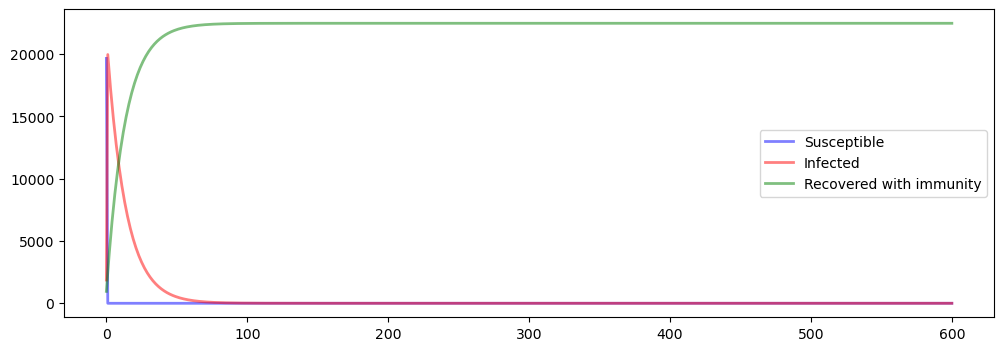

In [53]:
# plot of trajectory 0
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, x_t[5, :, 0], 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, x_t[5, :, 1], 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, x_t[5, :, 2], 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.legend()
plt.show()

POSSÍVEL PROBLEMA: curva muito acentuada no início.

In [56]:
# Normalization
nn_input = nn_input / 20000
nn_output = nn_output / 20000

In [54]:
net = keras.models.Sequential()
net.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
net.add(layers.Dense(10, activation='relu'))
net.add(layers.Dense(3, activation='linear'))
net.compile(loss='mse', optimizer='adam')

In [57]:
History = net.fit(nn_input, nn_output, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 5163.8687
Epoch 2/30
1875/1875 [==============================] - 7s 3ms/step - loss: 8.8983
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 3.1351
Epoch 4/30
1875/1875 [==============================] - 7s 3ms/step - loss: 2.6312
Epoch 5/30
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7608
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4454
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0207
Epoch 8/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0071
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0064
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0056
Epoch 11/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0046
Epoch 12/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.003

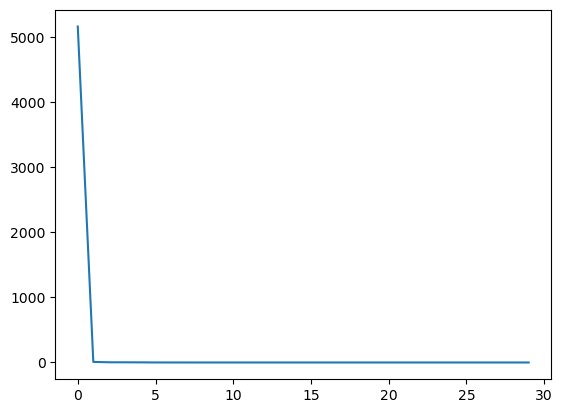

In [58]:
plt.plot(History.history['loss'])

In [70]:
# 2 casos testes
num_traj = 2

ynn = np.zeros((num_traj, len(t), 3))
s_teste = np.random.randint(10000, 20000, size=num_traj)
i_teste = np.random.randint(1000, 2000, size=num_traj)
r_teste = np.random.randint(0, 1000, size=num_traj)
ynn[:, 0, :] = np.array([s_teste, i_teste, r_teste]).T
for jj, tval in enumerate(t[:-1]):
    ynn[:, jj+1, :] = net.predict(ynn[:, jj, :], verbose=1)

1/1 [==============================] - 0s 20ms/step


array([[[ 1.39870000e+04,  1.85600000e+03,  2.29000000e+02],
        [ 3.63292277e-01,  4.72624435e+01,  7.27724533e+01],
        [-4.60556448e-01,  5.84156570e+01,  1.01043777e+02],
        ...,
        [-4.74864423e-01,  5.89680939e+01,  1.02221558e+02],
        [-4.74864423e-01,  5.89680939e+01,  1.02221558e+02],
        [-4.74864423e-01,  5.89680939e+01,  1.02221558e+02]],

       [[ 1.04410000e+04,  1.77800000e+03,  1.61000000e+02],
        [ 3.63292277e-01,  4.72624435e+01,  7.27724533e+01],
        [-4.60556448e-01,  5.84156570e+01,  1.01043777e+02],
        ...,
        [-4.74864423e-01,  5.89680939e+01,  1.02221558e+02],
        [-4.74864423e-01,  5.89680939e+01,  1.02221558e+02],
        [-4.74864423e-01,  5.89680939e+01,  1.02221558e+02]]])

In [71]:
# solve ODE, the two trajectories
y_t_1 = integrate.odeint(sir_deriv, ynn[0, 0, :], t)
y_t_2 = integrate.odeint(sir_deriv, ynn[1, 0, :], t)
print(y_t_1)
print(y_t_2)

[[ 1.39870000e+04  1.85600000e+03  2.29000000e+02]
 [ 3.06612074e-16  1.46989861e+04  1.37301387e+03]
 [ 4.67215355e-15  1.36368886e+04  2.43511137e+03]
 ...
 [-3.18147819e-11 -3.82225420e-11  1.60720000e+04]
 [-3.18147819e-11 -3.81249480e-11  1.60720000e+04]
 [-3.18147819e-11 -3.80273539e-11  1.60720000e+04]]
[[ 1.04410000e+04  1.77800000e+03  1.61000000e+02]
 [ 1.58158965e-14  1.13367683e+04  1.04323170e+03]
 [ 5.69891510e-15  1.05176129e+04  1.86238706e+03]
 ...
 [-1.66322543e-13 -5.07982602e-11  1.23800000e+04]
 [-1.66322543e-13 -5.06470324e-11  1.23800000e+04]
 [-1.66322543e-13 -5.04958045e-11  1.23800000e+04]]


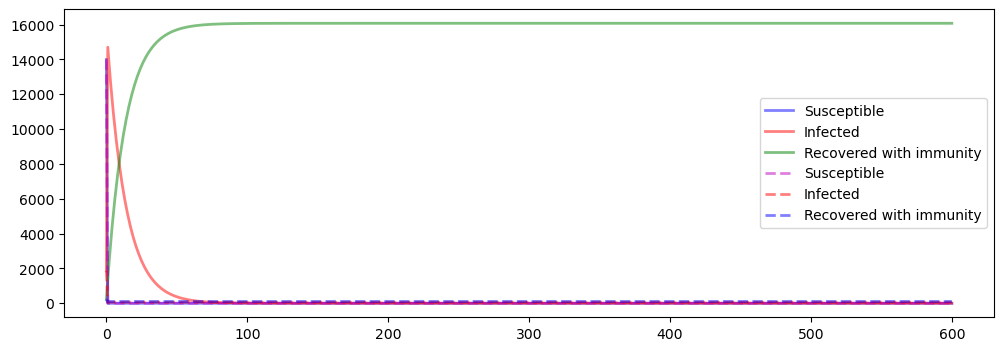

In [72]:
# plot y_t_1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111, axisbelow=True)
# Calculated
ax.plot(t, y_t_1[:, 0], 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, y_t_1[:, 1], 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, y_t_1[:, 2], 'g', alpha=0.5, lw=2, label='Recovered with immunity')
# Predicted (plot with dotted lines)
ax.plot(t, ynn[0, :, 0], 'm--', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, ynn[0, :, 1], 'r--', alpha=0.5, lw=2, label='Infected')
ax.plot(t, ynn[0, :, 2], 'b--', alpha=0.5, lw=2, label='Recovered with immunity')
plt.legend()
plt.show()

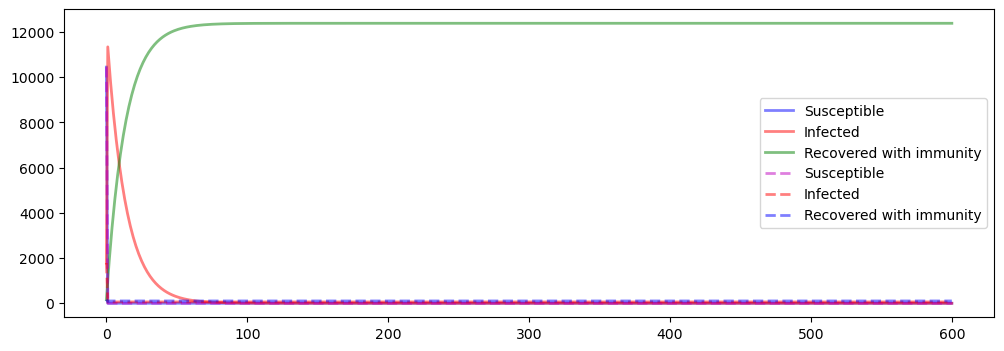

In [73]:
# plot y_t_2
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, y_t_2[:, 0], 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, y_t_2[:, 1], 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, y_t_2[:, 2], 'g', alpha=0.5, lw=2, label='Recovered with immunity')
# Predicted (plot with dotted lines)
ax.plot(t, ynn[1, :, 0], 'm--', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, ynn[1, :, 1], 'r--', alpha=0.5, lw=2, label='Infected')
ax.plot(t, ynn[1, :, 2], 'b--', alpha=0.5, lw=2, label='Recovered with immunity')
plt.legend()
plt.show()